In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import os
import glob
from hilbertcurve.hilbertcurve import HilbertCurve
from skimage.metrics import mean_squared_error
from skimage import io
from skimage.metrics import structural_similarity as ssim
import pandas as pd

In [4]:
image_list = []
for filename in sorted(glob.glob('/home/gamoba/Projects/Estadistica/TEST/*.png')):
    im=Image.open(filename)
    image_list.append(im)

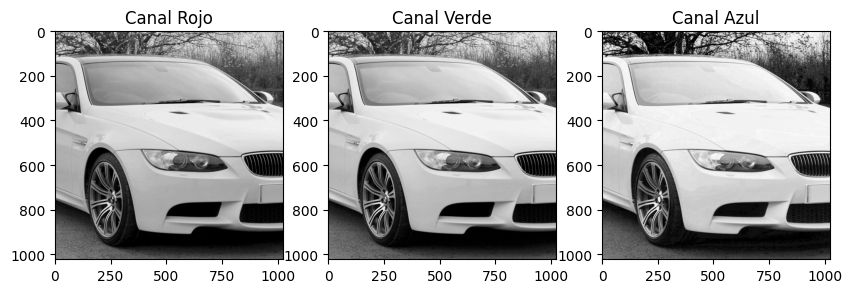

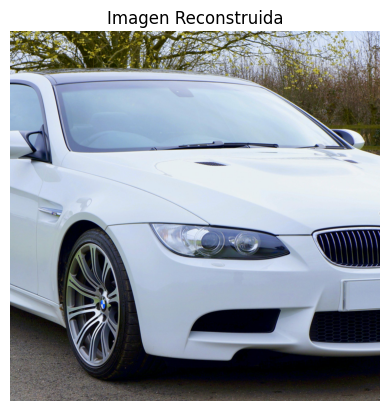

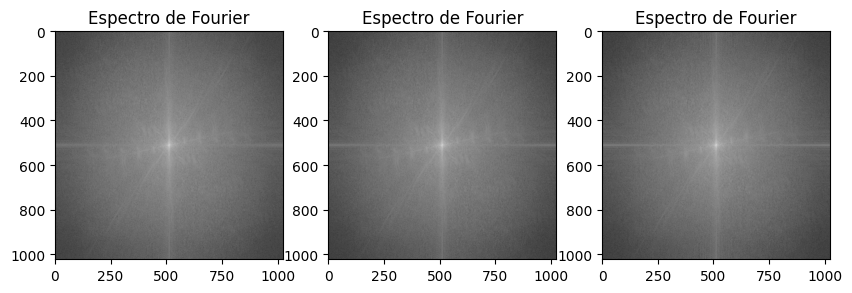

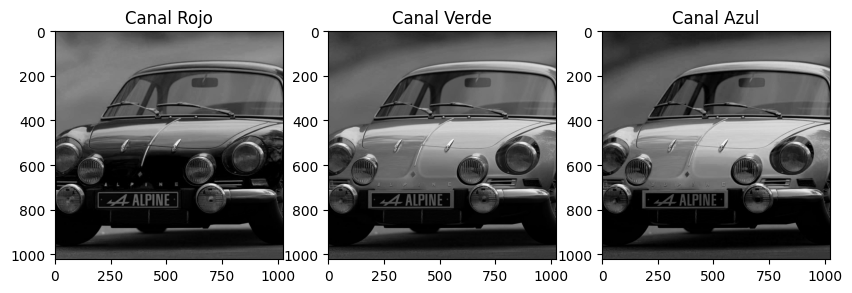

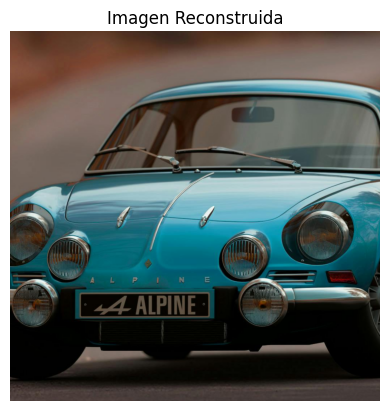

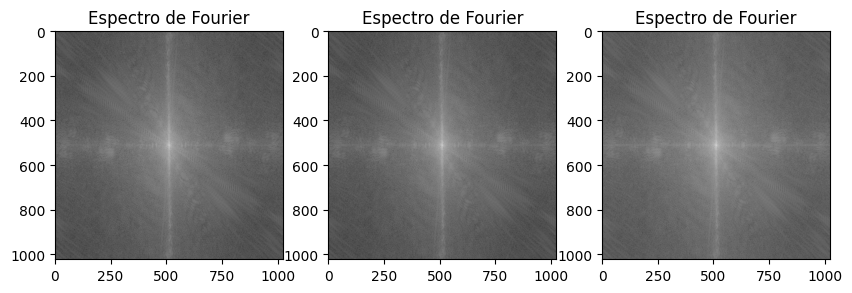

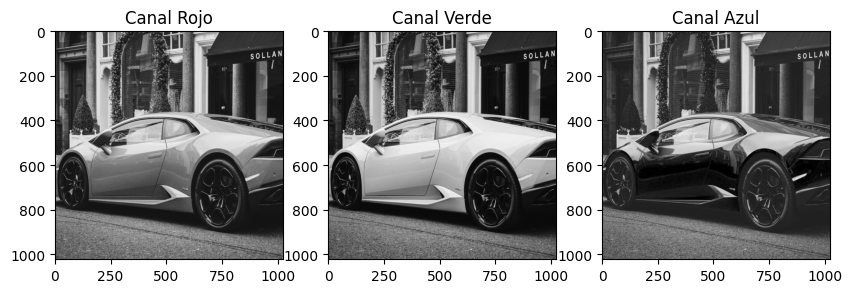

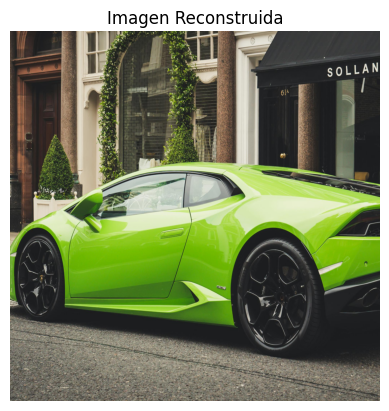

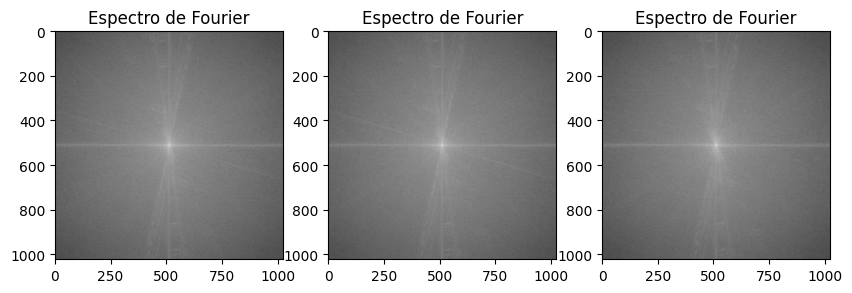

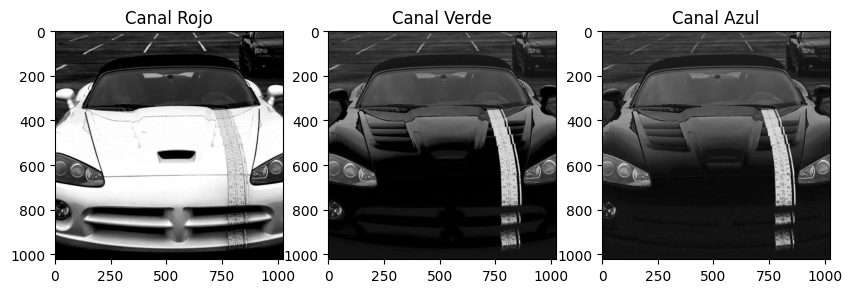

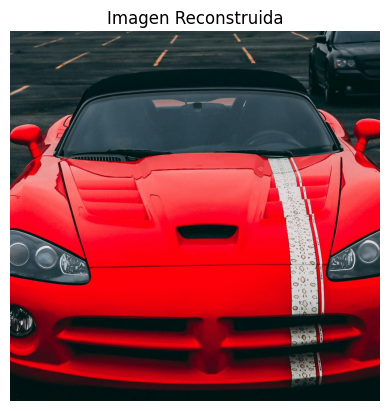

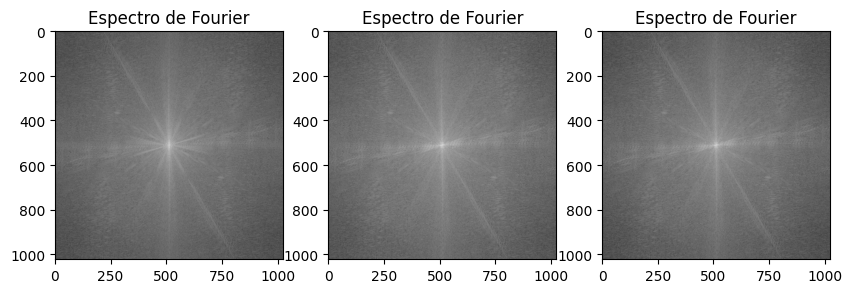

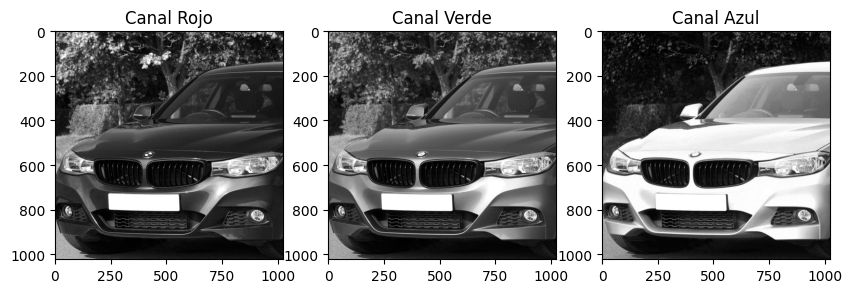

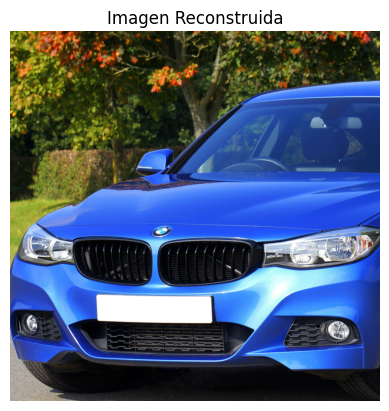

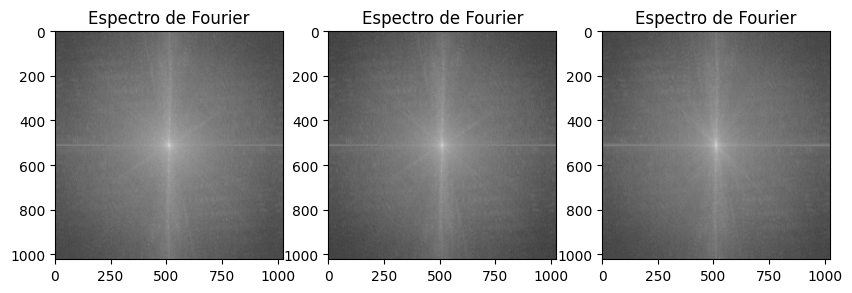

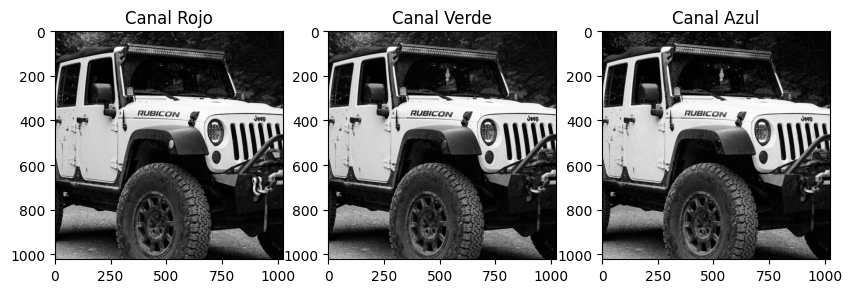

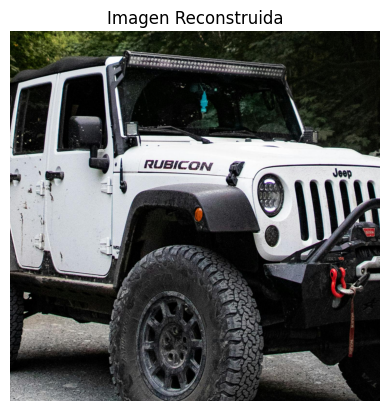

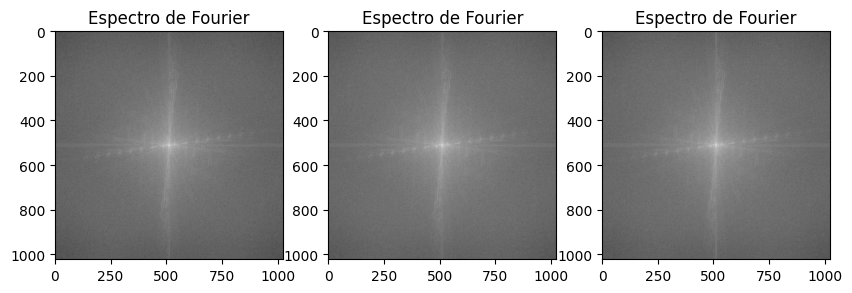

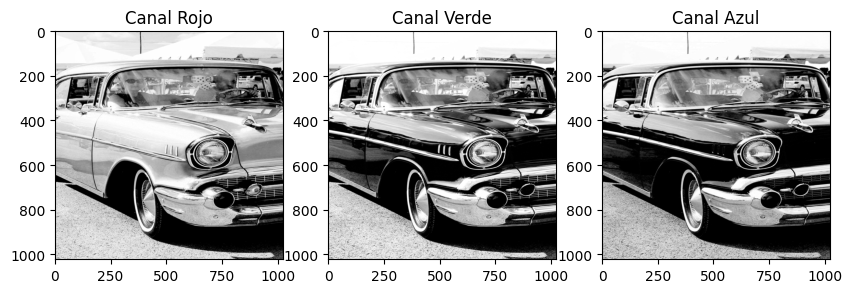

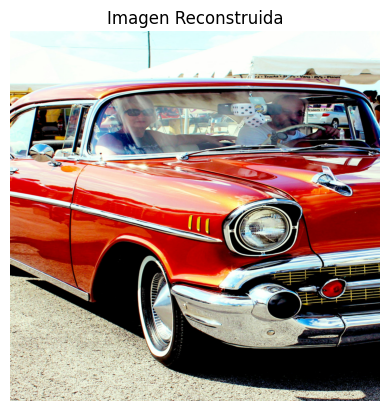

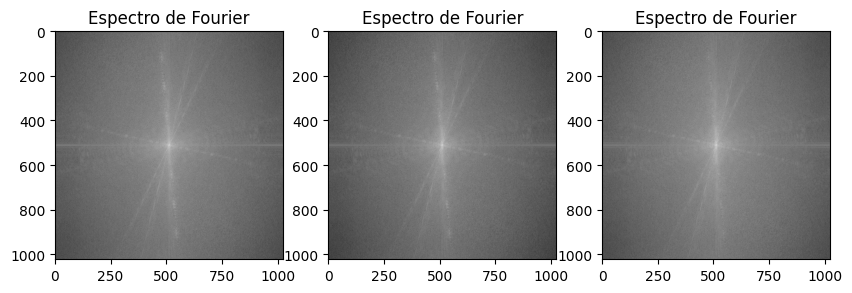

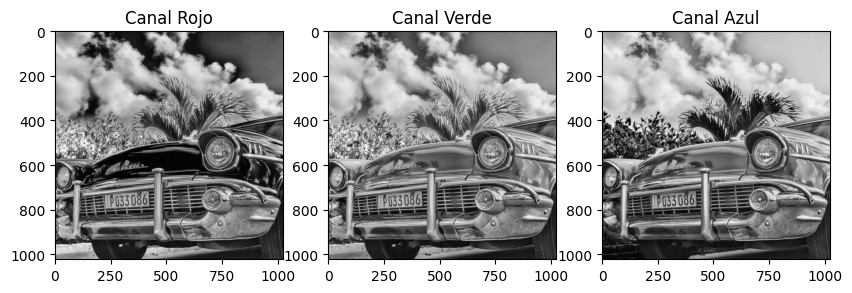

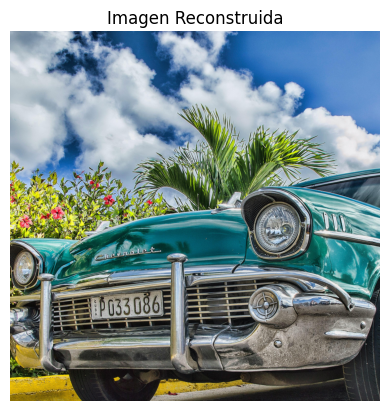

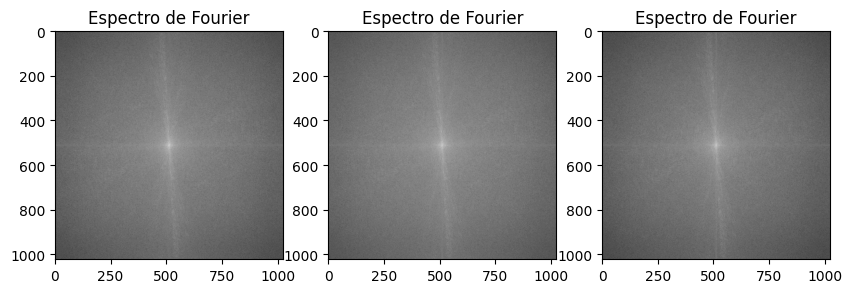

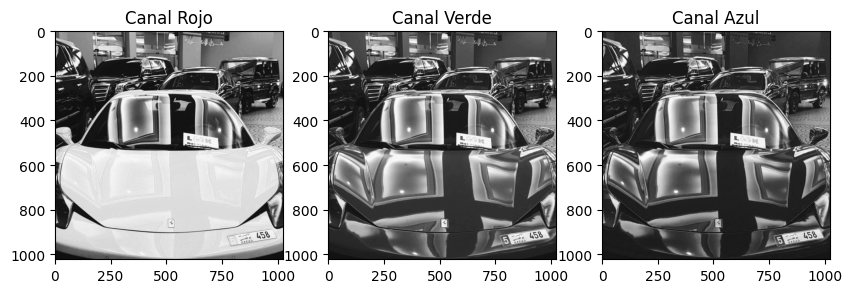

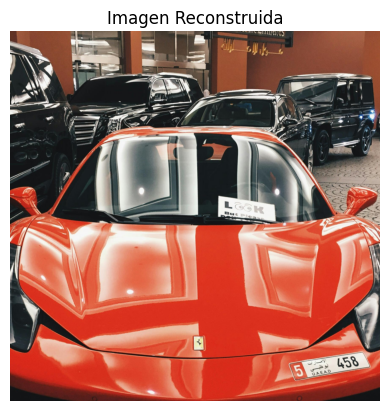

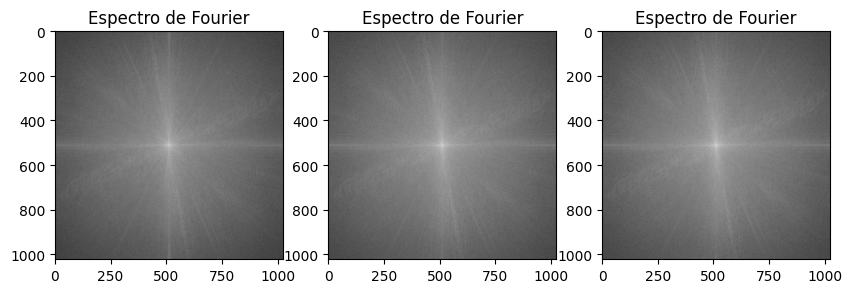

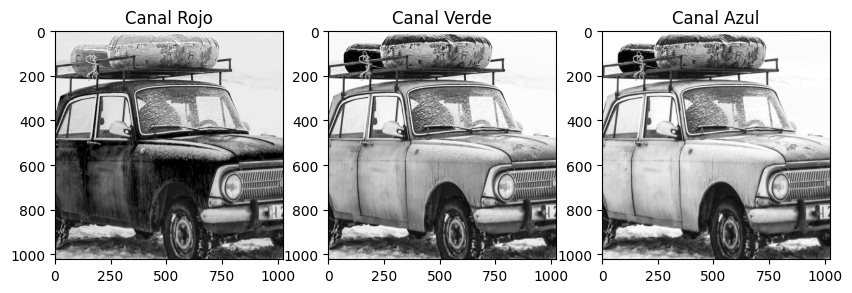

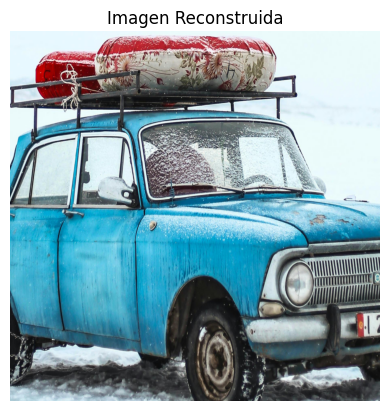

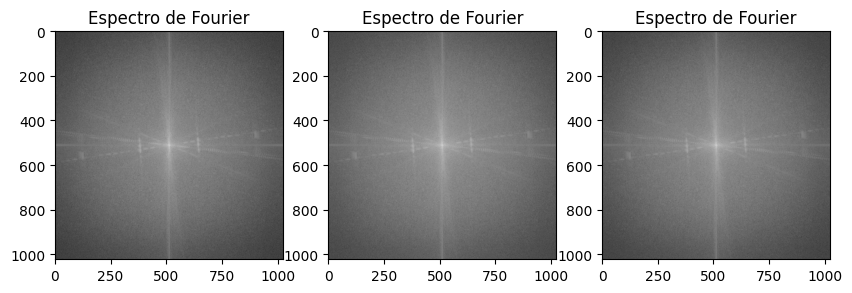

In [60]:
for i in range(len(image_list)):
    imagen_rgb = np.array(image_list[i])

    rojo = imagen_rgb[:, :, 0] 
    verde = imagen_rgb[:, :,1]  
    azul = imagen_rgb[:, :, 2]

    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 1)
    plt.imshow(rojo, cmap='gray')
    plt.title("Canal Rojo",)

    plt.subplot(1, 3, 2)
    plt.imshow(verde, cmap='gray')
    plt.title("Canal Verde")

    plt.subplot(1, 3, 3)
    plt.imshow(azul, cmap='gray')
    plt.title("Canal Azul")

    plt.show()

    imagen_reconstruida = np.dstack((rojo, verde, azul))
    plt.imshow(imagen_reconstruida)
    plt.title("Imagen Reconstruida")
    plt.axis('off')
    plt.show()

    plt.figure(figsize=(10, 3))
    fourier_rojo=np.fft.fft2(rojo)
    fourier_rojo_shift = np.fft.fftshift(fourier_rojo)
    rojo_fases = np.angle(fourier_rojo_shift)
    rojo_magnitudes = np.abs(fourier_rojo_shift)
    np.save('DATA/1/fases_carro'+str(i)+'.npy', rojo_fases)
    np.save('DATA/1/magnitudes_carro'+str(i)+'.npy', rojo_magnitudes)
    espectro_fourier = 20 * np.log(np.abs(fourier_rojo_shift) + 1)
    plt.subplot(1, 3, 1)
    plt.imshow(espectro_fourier, cmap='gray')
    plt.title('Espectro de Fourier')
    
    fourier_verde=np.fft.fft2(verde)
    fourier_verde_shift = np.fft.fftshift(fourier_verde)
    verde_fases = np.angle(fourier_verde_shift)
    verde_magnitudes = np.abs(fourier_verde_shift)
    np.save('DATA/2/fases_carro'+str(i)+'.npy', verde_fases)
    np.save('DATA/2/magnitudes_carro'+str(i)+'.npy', verde_magnitudes)
    espectro_fourier = 20 * np.log(np.abs(fourier_verde_shift) + 1)
    plt.subplot(1, 3, 2)
    plt.imshow(espectro_fourier, cmap='gray')
    plt.title('Espectro de Fourier')

    fourier_azul=np.fft.fft2(azul)
    fourier_azul_shift = np.fft.fftshift(fourier_azul)
    azul_fases = np.angle(fourier_azul_shift)
    azul_magnitudes = np.abs(fourier_azul_shift)
    np.save('DATA/3/fases_carro'+str(i)+'.npy', azul_fases)
    np.save('DATA/3/magnitudes_carro'+str(i)+'.npy', azul_magnitudes)
    espectro_fourier = 20 * np.log(np.abs(fourier_azul_shift) + 1)
    plt.subplot(1, 3, 3)
    plt.imshow(espectro_fourier, cmap='gray')
    plt.title('Espectro de Fourier')

In [74]:
def hilbert_curve(k, j,fases):
    hilbert_curve = HilbertCurve(10, 2)
    hilbert_ordered_values = [fases[x, y] for i in range(fases.size) for x, y in [hilbert_curve.point_from_distance(i)]]
    num_elements = int(0.05 * len(hilbert_ordered_values))
    hilbert_ordered_values[:num_elements] = [0]*num_elements
    hilbert_ordered_values[len(hilbert_ordered_values)-num_elements:len(hilbert_ordered_values)] = [0]*(len(hilbert_ordered_values)-(len(hilbert_ordered_values)-num_elements))
    reconstructed_array = np.zeros(fases.shape, dtype=fases.dtype)
    for i in range(fases.size):
        x, y = hilbert_curve.point_from_distance(i)  
        reconstructed_array[x, y] = hilbert_ordered_values[i]  
    np.save('DATA/'+str(j)+'/hilbert_carro'+str(k)+'.npy', reconstructed_array)

In [75]:
for j in range(1,4):
    fases = []
    for filename in sorted(glob.glob('/home/gamoba/Projects/Estadistica/DATA/'+str(j)+'/fases_*.npy')):
        im=np.load(filename)
        fases.append(im)
    for i in range(len(fases)):
        hilbert_curve(i, j, fases[i])    

In [76]:
for j in range(1,4):
    hilbert = []
    for filename in sorted(glob.glob('/home/gamoba/Projects/Estadistica/DATA/'+str(j)+'/hilbert_*.npy')):
            im=np.load(filename)
            hilbert.append(im)
    magnitudes = []
    for filename in sorted(glob.glob('/home/gamoba/Projects/Estadistica/DATA/'+str(j)+'/magnitudes_*.npy')):
        im=np.load(filename)
        magnitudes.append(im)
    for i in range(len(hilbert)):
        fourier_reconstruido = magnitudes[i] * np.exp(1j * hilbert[i])
        fourier_reconstruido = np.fft.ifftshift(fourier_reconstruido)
        imagen_reconstruida = np.fft.ifft2(fourier_reconstruido)
        imagen_reconstruida = np.abs(imagen_reconstruida)
        plt.imsave('DATA/'+str(j)+'/imagen_reconstruida_carro'+str(i)+'.png', imagen_reconstruida, cmap='gray')

In [77]:
for i in range (0,10):
    reconstruida1 = Image.open('/home/gamoba/Projects/Estadistica/DATA/1/imagen_reconstruida_carro'+str(i)+'.png')
    reconstruida2 = Image.open('/home/gamoba/Projects/Estadistica/DATA/2/imagen_reconstruida_carro'+str(i)+'.png')
    reconstruida3 = Image.open('/home/gamoba/Projects/Estadistica/DATA/3/imagen_reconstruida_carro'+str(i)+'.png')
    arreglo_reconstruida1 = np.array(reconstruida1)
    arreglo_reconstruida2 = np.array(reconstruida2)
    arreglo_reconstruida3 = np.array(reconstruida3)
    red = arreglo_reconstruida1[:, :, 0]
    green = arreglo_reconstruida2[:, :, 1]
    blue = arreglo_reconstruida3[:, :, 2]
    imagen_reconstruida = np.dstack((red, green, blue))
    plt.imsave('DATA/7/imagen_reconstruida_carro'+str(i)+'.png', imagen_reconstruida)
    

In [87]:
import os
import pandas as pd
import cv2
from skimage.metrics import structural_similarity as ssim

resultados = []
carpetas = ['5', '6', '7']

for carpeta in carpetas:
    for i in range(0, 10):
        ruta_imagen_reconstruida = f'/home/gamoba/Projects/Estadistica/DATA/{carpeta}/imagen_reconstruida_carro{i}.png'
        ruta_imagen_original = f'/home/gamoba/Projects/Estadistica/TEST/carro{i}.png'        
        peso_bytes_reconstruida = os.path.getsize(ruta_imagen_reconstruida)
        peso_bytes_original = os.path.getsize(ruta_imagen_original)        
        porcentaje = ((1 - (peso_bytes_reconstruida / peso_bytes_original)) * 100) * -1        
        img_reconstruida = cv2.imread(ruta_imagen_reconstruida, cv2.IMREAD_GRAYSCALE)
        img_original = cv2.imread(ruta_imagen_original, cv2.IMREAD_GRAYSCALE)
        ssim_index, _ = ssim(img_original, img_reconstruida, full=True)
        resultados.append({
            "Imagen": f"carro{i}",
            f"{carpeta}_SSIM": round(ssim_index, 4),
            f"{carpeta}_Cambio (%)": round(porcentaje, 2)
        })

tabla = pd.DataFrame(resultados)
tabla_final = tabla.groupby("Imagen").first().reset_index()
print(tabla_final)


   Imagen  5_SSIM  5_Cambio (%)  6_SSIM  6_Cambio (%)  7_SSIM  7_Cambio (%)
0  carro0  0.9417         -9.45  0.9921         -4.00  0.9762         -6.94
1  carro1  0.9742         30.56  0.9717         30.32  0.9938         37.68
2  carro2  0.8442         -4.29  0.8493         -5.29  0.9728          2.84
3  carro3  0.8263         -4.25  0.9105          0.64  0.9607          4.95
4  carro4  0.9906         -7.41  0.9944         -6.22  0.9965         -5.82
5  carro5  0.5638        -10.53  0.5671        -10.45  0.6348         -7.02
6  carro6  0.5732        -27.85  0.5459        -27.43  0.5934        -25.96
7  carro7  0.3455        -31.25  0.3822        -29.36  0.4618        -25.98
8  carro8  0.9703         -1.08  0.9828         -0.14  0.9958          2.15
9  carro9  0.6950        -16.86  0.7178        -15.38  0.8480        -10.02


<table border="1">
    <thead>
        <tr>
            <th>Imagen</th>
            <th>5_SSIM</th>
            <th>5_Cambio (%)</th>
            <th>6_SSIM</th>
            <th>6_Cambio (%)</th>
            <th>7_SSIM</th>
            <th>7_Cambio (%)</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>carro0</td>
            <td>0.9417</td>
            <td>-9.45</td>
            <td>0.9921</td>
            <td>-4.00</td>
            <td>0.9762</td>
            <td>-6.94</td>
        </tr>
        <tr>
            <td>carro1</td>
            <td>0.9742</td>
            <td>30.56</td>
            <td>0.9717</td>
            <td>30.32</td>
            <td>0.9938</td>
            <td>37.68</td>
        </tr>
        <tr>
            <td>carro2</td>
            <td>0.8442</td>
            <td>-4.29</td>
            <td>0.8493</td>
            <td>-5.29</td>
            <td>0.9728</td>
            <td>2.84</td>
        </tr>
        <tr>
            <td>carro3</td>
            <td>0.8263</td>
            <td>-4.25</td>
            <td>0.9105</td>
            <td>0.64</td>
            <td>0.9607</td>
            <td>4.95</td>
        </tr>
        <tr>
            <td>carro4</td>
            <td>0.9906</td>
            <td>-7.41</td>
            <td>0.9944</td>
            <td>-6.22</td>
            <td>0.9965</td>
            <td>-5.82</td>
        </tr>
        <tr>
            <td>carro5</td>
            <td>0.5638</td>
            <td>-10.53</td>
            <td>0.5671</td>
            <td>-10.45</td>
            <td>0.6348</td>
            <td>-7.02</td>
        </tr>
        <tr>
            <td>carro6</td>
            <td>0.5732</td>
            <td>-27.85</td>
            <td>0.5459</td>
            <td>-27.43</td>
            <td>0.5934</td>
            <td>-25.96</td>
        </tr>
        <tr>
            <td>carro7</td>
            <td>0.3455</td>
            <td>-31.25</td>
            <td>0.3822</td>
            <td>-29.36</td>
            <td>0.4618</td>
            <td>-25.98</td>
        </tr>
        <tr>
            <td>carro8</td>
            <td>0.9703</td>
            <td>-1.08</td>
            <td>0.9828</td>
            <td>-0.14</td>
            <td>0.9958</td>
            <td>2.15</td>
        </tr>
        <tr>
            <td>carro9</td>
            <td>0.6950</td>
            <td>-16.86</td>
            <td>0.7178</td>
            <td>-15.38</td>
            <td>0.8480</td>
            <td>-10.02</td>
        </tr>
    </tbody>
</table>
